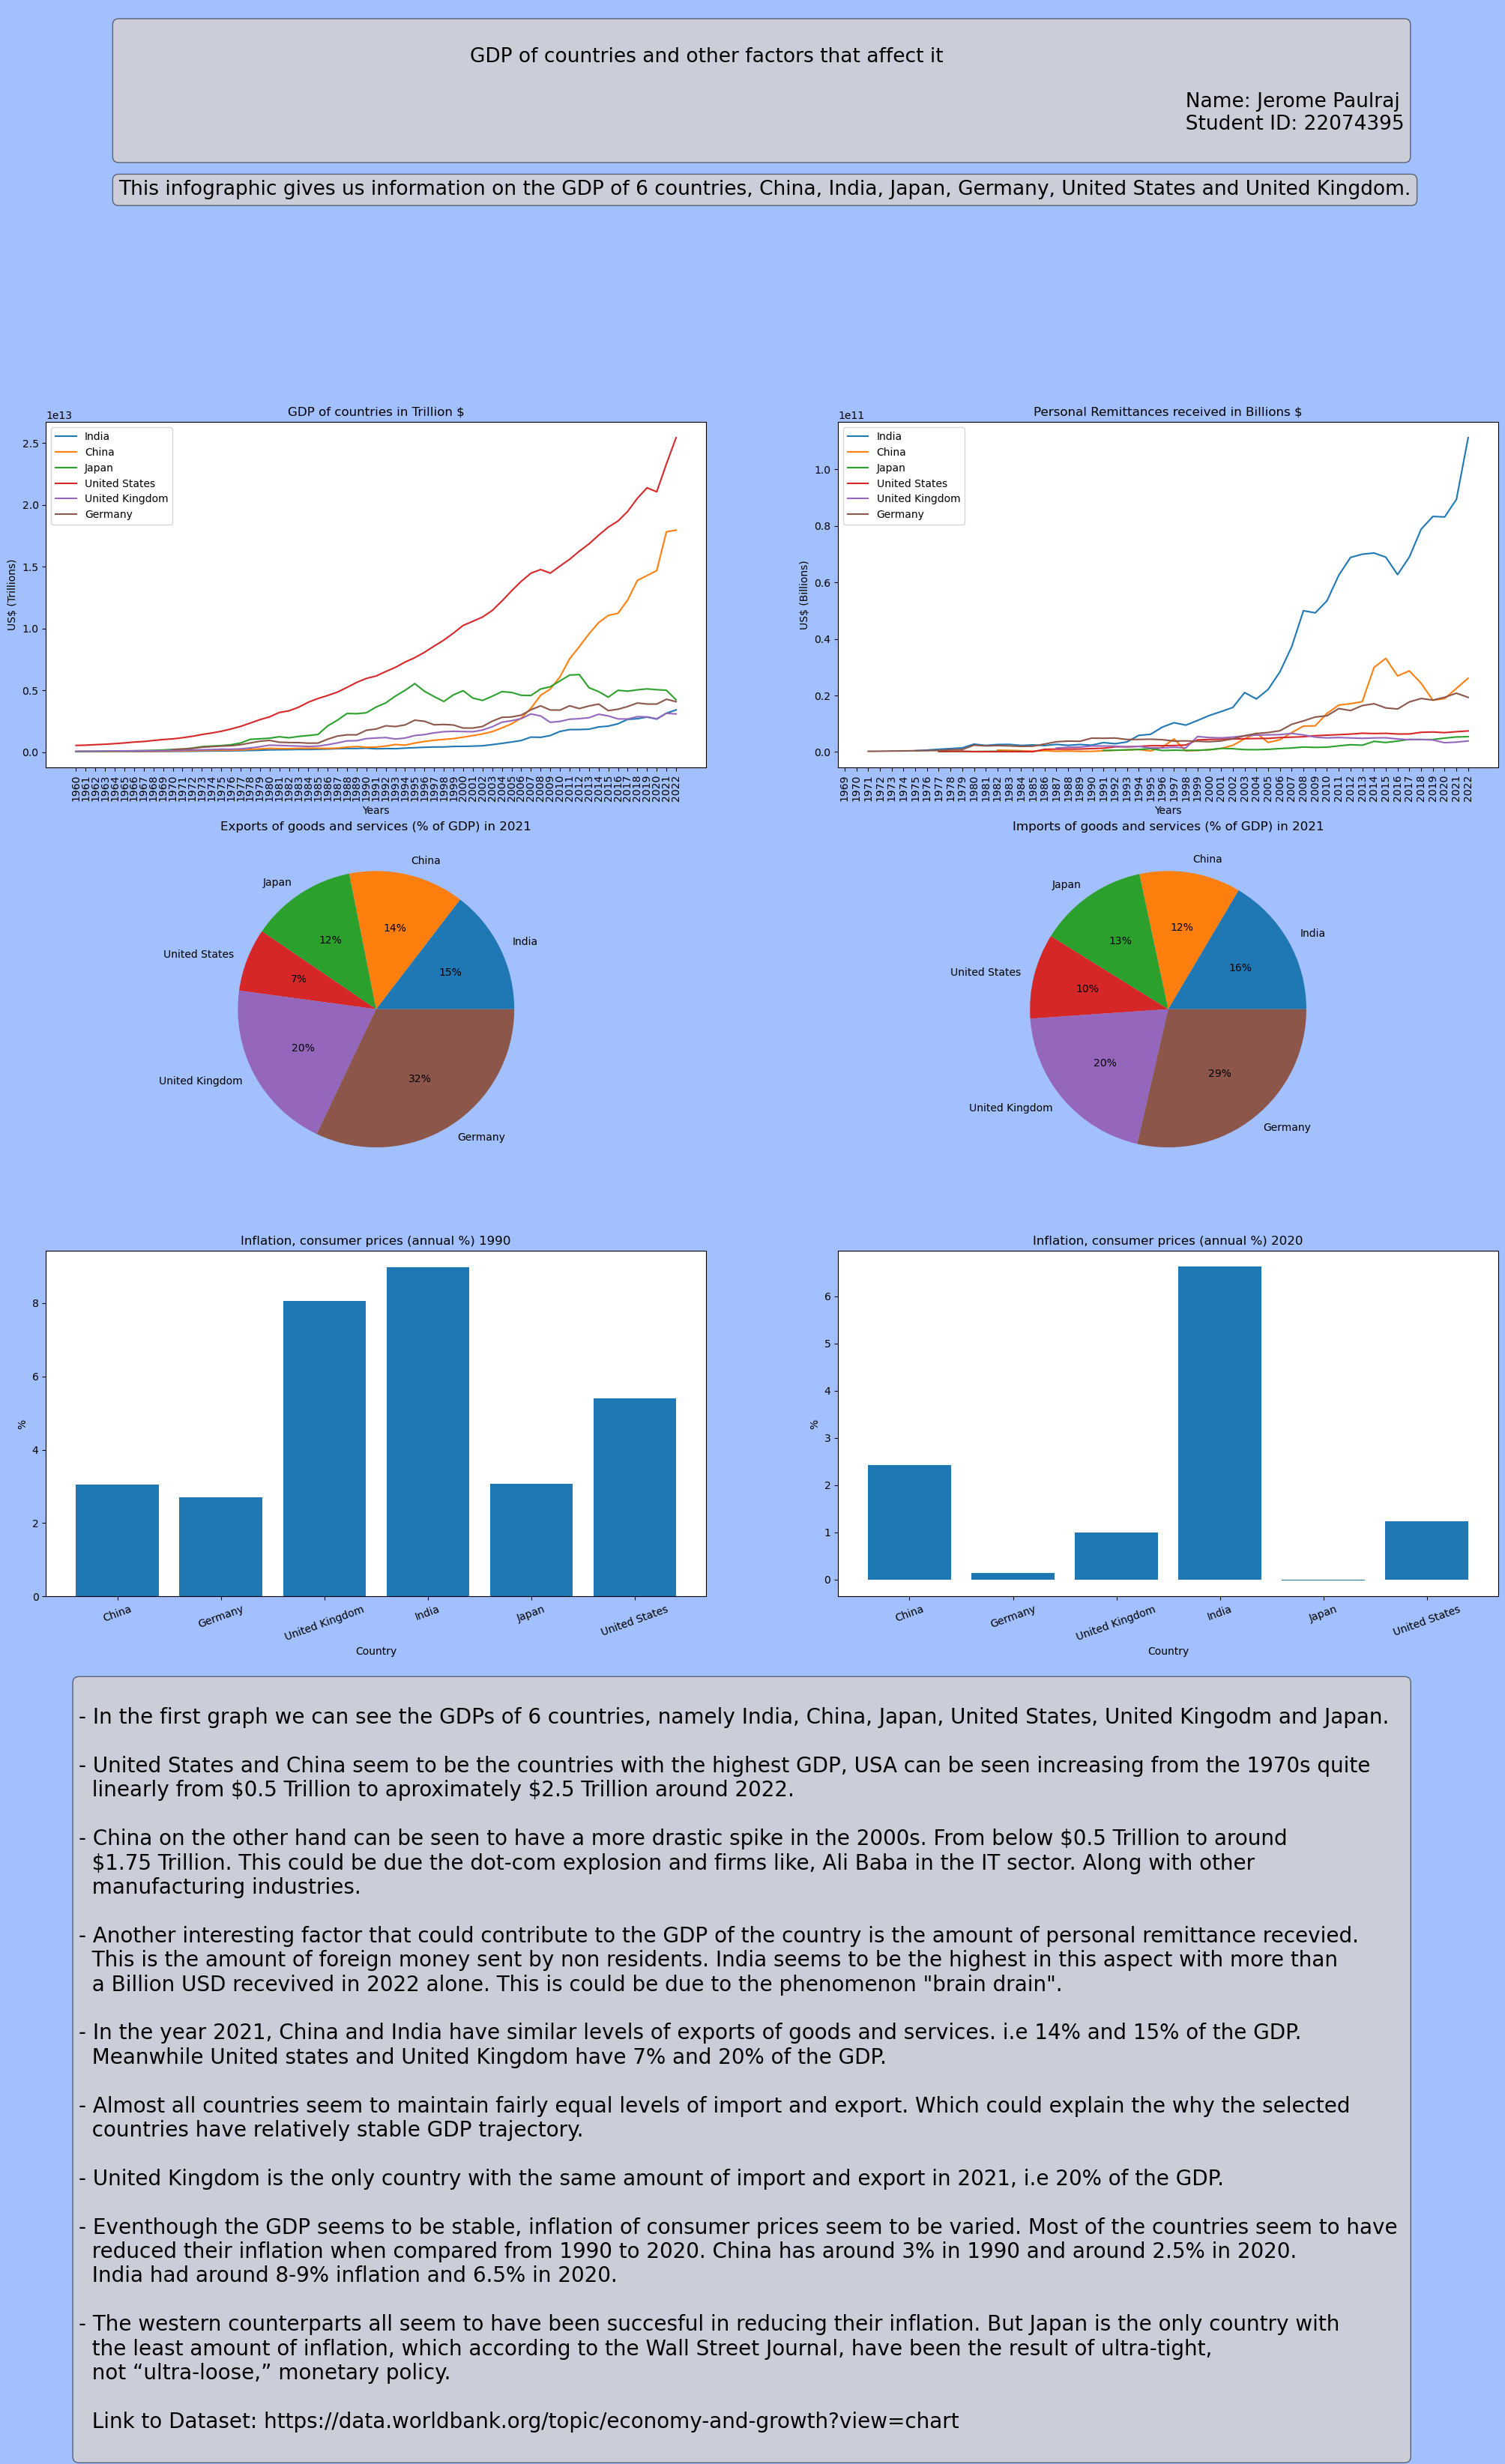

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(dataset, country_list):
    """
    This function takes in a csv file and a list of countries that are of
    interest. Returns two dataframes one with the years as columns and the
    other country names as columns.

    Parameters
    ----------
    dataset : .csv file
    country_list : List
    """
    # skipping first 4 rows, as they contain non essential data.
    world_bank_df = pd.read_csv(dataset, skiprows=4)

    # Removing non essential data.
    world_bank_df.drop(['Country Code', 'Indicator Code', 'Unnamed: 67'],
                       axis=1, inplace=True)

    # subsetting the dataframe to get data for countries we are interested in.
    world_bank_df = world_bank_df[
        world_bank_df['Country Name'].isin(country_list)]

    # Setting index before transposing the dataframe
    temp_df = world_bank_df.set_index('Country Name')

    return world_bank_df, temp_df.T


def create_line_plot(data, countries, indicator, xlabel, ylabel, title):
    """
    This function generates line plots for the given dataframe for a particular
    indicator in the world bank dataset. It also requires a list of country
    names.
    Parameters
    ----------
    data : TYPE
    countries : TYPE
    indicator : TYPE
    xlabel : TYPE
    ylabel : TYPE
    title : TYPE

    Returns None
    """
    # Iterating over the list of countries
    for country in countries:
        temp_df = data[country].T
        # Subsetting the transposed df. Which now has years as columns
        subset_df = temp_df[temp_df['Indicator Name'] == indicator]
        # Transposing the df again to makes years the index.
        subset_df = subset_df.T

        # Plotting using the subset df.
        # Plotting using for loop to include line plots of every country
        # in the same figure.        
        plt.plot(subset_df[1:], label=country)

        # Labelling
        plt.xticks(rotation=90)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend()

    return 


def create_pie_chart(data, year, countries, indicator, title):
    """
    Creates a pie chart for the specified year. Uses the dataframe plot
    function create a pie chart for a list of countries
    and a specific indicator.

    Parameters
    ----------
    data : Pandas DataFrame
    year : String
    countries : List
    indicator : string

    Returns None
    """
    # Creating an  empty Dataframe to store the specified indicator values for
    # each country.
    result = pd.DataFrame()

    # Iterating through the list of countries
    for country in countries:
        # Transposing the dataframe to be able to extract indicator values
        temp_df = data[country].T
        subset_df = temp_df[temp_df['Indicator Name'] == indicator]

        # Transposing the subset to make the years rows from columns.
        subset_df = subset_df.T

        # Creating a new column in the result df and add the current country's
        # indicator value, i.e the subset_df
        result[country] = subset_df

    # Since the dataframe contains values of only one indicator value and
    # only country name is needed, dropping the first row with indicator name.
    result = result.drop(['Indicator Name'], axis=0)

    # Selecting a particular year for the pie chart.
    result = result.loc[str(year)]

    # Plotting pie chart using the df.plot method
    result.plot(kind='pie', subplots=True, autopct="%1.f%%", ylabel="")

    # using arguments passed while calling funtion to create title.
    plt.title(title+" in "+str(year))

    return

def create_bar_graph(data, year, indicator, title):
    """
    This function generates a bar plot of the Population growth (annual %)
    for the countries specified in the country_list variable. For a given year

    Returns None
    """

    # Extracting only the selected indicator's data
    subset_data = data[
        data['Indicator Name'] == indicator]
    
    # Passing X-axis as country names and Y-axis is all rows,
    # in the specified year. Here year is a column name
    plt.bar(subset_data['Country Name'],
            subset_data.loc[:, str(year)])

    # labelling
    plt.xlabel("Country")
    plt.ylabel("%")
    plt.xticks(rotation=20)
    plt.title(title)

    return

countries = ['India', 'China', 'Japan', 'United States', 'United Kingdom', 'Germany']

#Loading Dataset from World Bank. The dataset used is from the Economy and Growth section
#Link to Dataset: https://data.worldbank.org/topic/economy-and-growth?view=chart
data, dataT = load_data(
    'economy_growth.csv',
    countries)


fig = plt.figure(figsize=[25,20])
#plt.rcParams.update({'font.size': 15})

plt.subplot(711)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

textstr = """
                                                        GDP of countries and other factors that affect it                                
                                                                                                                                                                          
                                                                                                                                                                          Name: Jerome Paulraj
                                                                                                                                                                          Student ID: 22074395
 """
t = "This infographic gives us information on the GDP of 6 countries, China, India, Japan, Germany, United States and United Kingdom."
plt.axis('off')
plt.text(0.05, 0.95, textstr, bbox=props,fontsize=19, verticalalignment='top')
plt.text(0.05, 0.50, t, bbox=props,fontsize=19, verticalalignment='top')

plt.subplot(723)

# Generating a line plot for the selected indicator
create_line_plot(dataT, countries,
                   'GDP (current US$)',
                   "Years",
                   "US$ (Trillions)",
                   "GDP of countries in Trillion $"
                  )

plt.subplot(724)

# Generating a line plot for the selected indicator
create_line_plot(dataT, countries,
                   'Personal remittances, received (current US$)',
                   "Years",
                   "US$ (Billions)",
                   "Personal Remittances received in Billions $",
                  )


plt.subplot(725)
# Creating a pie chart of an indicator for a selected country and year.
create_pie_chart(
    dataT,
    2021,
    countries,
    'Exports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)'
)

plt.subplot(726)
# Creating a pie chart of an indicator for a selected country and year.
create_pie_chart(
    dataT,
    2021,
    countries,
    'Imports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)'
)

plt.subplot(7,2,7)
# Creating a bar chart of an indicator for a selected country and year.
create_bar_graph(
    data,
    1990,
    'Inflation, consumer prices (annual %)',
    title="Inflation, consumer prices (annual %) 1990"
)


plt.subplot(728)
# Creating a bar chart of an indicator for a selected country and year.
create_bar_graph(
    data,
    2020,
    'Inflation, consumer prices (annual %)',
    title="Inflation, consumer prices (annual %) 2020"
)



plt.subplot(7,2,9)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

textstr = """
- In the first graph we can see the GDPs of 6 countries, namely India, China, Japan, United States, United Kingodm and Japan.

- United States and China seem to be the countries with the highest GDP, USA can be seen increasing from the 1970s quite 
  linearly from \$0.5 Trillion to aproximately \$2.5 Trillion around 2022.

- China on the other hand can be seen to have a more drastic spike in the 2000s. From below \$0.5 Trillion to around 
  \$1.75 Trillion. This could be due the dot-com explosion and firms like, Ali Baba in the IT sector. Along with other
  manufacturing industries.
  
- Another interesting factor that could contribute to the GDP of the country is the amount of personal remittance recevied.
  This is the amount of foreign money sent by non residents. India seems to be the highest in this aspect with more than
  a Billion USD recevived in 2022 alone. This is could be due to the phenomenon "brain drain".  

- In the year 2021, China and India have similar levels of exports of goods and services. i.e 14% and 15% of the GDP.
  Meanwhile United states and United Kingdom have 7% and 20% of the GDP.

- Almost all countries seem to maintain fairly equal levels of import and export. Which could explain the why the selected
  countries have relatively stable GDP trajectory.

- United Kingdom is the only country with the same amount of import and export in 2021, i.e 20% of the GDP.

- Eventhough the GDP seems to be stable, inflation of consumer prices seem to be varied. Most of the countries seem to have 
  reduced their inflation when compared from 1990 to 2020. China has around 3% in 1990 and around 2.5% in 2020. 
  India had around 8-9% inflation and 6.5% in 2020.

- The western counterparts all seem to have been succesful in reducing their inflation. But Japan is the only country with 
  the least amount of inflation, which according to the Wall Street Journal, have been the result of ultra-tight, 
  not “ultra-loose,” monetary policy. 
 
  Link to Dataset: https://data.worldbank.org/topic/economy-and-growth?view=chart
 """


plt.text(0.05, 0.95, textstr, fontsize=20,bbox=props,verticalalignment='top')
plt.subplots_adjust(top = 2)

plt.axis('off')

fig.patch.set_facecolor('xkcd:pastel blue')

plt.savefig('22074395.png', bbox_inches='tight', dpi=300)